# Анализ данных продажи компьютерных игр

# Описание данных
- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Цель работы
Выявить определяющие успешность игры закономерности.

# План
- Шаг 1. Открыть файл с данными и изучить общую информацию
- Шаг 2. Подготовить данные к анализу
- Шаг 3. Провести исследовательский анализ данных
- Шаг 4. Составить портрет пользователя каждого региона
- Шаг 5. Проверить гипотезы
- Шаг 6. Написать общий вывод

# Шаг 1. Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Вывод:
В датасете 11 столбцов с различными данными. Необходимо привести названия столбцов к нижнему регистру, преобразовать данные в нужные типы, обработать пропуски, посчитать суммарные продажи во всех регионах и записать в отдельный столбец.

# Шаг 2. Подготовить данные к анализу

In [5]:
# проверим на дубликаты
df.duplicated().sum()

0

In [6]:
# удаление небольшого количества пропусков не сильно повлияет на данные
df = df.dropna(subset=['Year_of_Release'])

In [8]:
# переводим в int из float так как там все значения целочисленные
df['Year_of_Release']=df['Year_of_Release'].astype('int')
warnings.filterwarnings("ignore")

In [9]:
# проверяем неявные дубликаты
df_duplicated = df[df.duplicated(['Name', 'Platform','Year_of_Release'])]
df_duplicated

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16446 non-null  object 
 2   Year_of_Release  16446 non-null  int64  
 3   Genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   Other_sales      16446 non-null  float64
 8   Critic_Score     7983 non-null   float64
 9   User_Score       9839 non-null   object 
 10  Rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [11]:
# Удалим дубликаты
df = df.drop_duplicates(subset=['Name', 'Platform','Year_of_Release'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16443 non-null  object 
 1   Platform         16444 non-null  object 
 2   Year_of_Release  16444 non-null  int64  
 3   Genre            16443 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   Critic_Score     7982 non-null   float64
 9   User_Score       9838 non-null   object 
 10  Rating           9767 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Обнаружены два неявных дубликата. Их можно было удалить, потому что они затрагивают небольшой объем данных.

In [13]:
# приведем к нижнему регистру названия столбцов
df.columns = df.columns.str.lower()

In [14]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [15]:
# в колонка critic_score, user_score и rating много пропусков поэтому лучше их оставить
df.isna().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         6606
rating             6677
dtype: int64

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
# как и critic_score переводим во float
#  Значения tbd (to be defined) меняем на nan
df['user_score'] = pd.to_numeric(df['user_score'], errors ='coerce') 

In [18]:
df['sales_total'] = df['eu_sales'] + df['na_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Возмножно пропуски в столбцах critic_score, user_score и rating связаны с тем, что их необязательно заполнять. Или в базе данных интернет-магазина «Стримчик» нету этих данных.

# Вывод:
Была выполнена проверка на дубликаты, столбцы были приведены к нижнему регистру. В колонка critic_score, user_score и rating было обнаруженно множество пропусков, но было решено оставить их из-за невозможности правильного заполнения. Значения tbd были заменены на nan, необходимые столбцы были приведены к нужным типам данных.

# Шаг 3. Провести исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

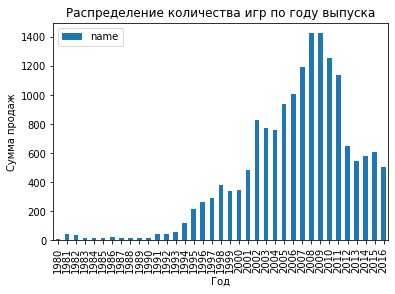

In [19]:
games_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_years.plot(y='name', kind='bar')
plt.title('Распределение количества игр по году выпуска')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

В 80-е выпускалось очень мало игр каждый год, в 90-е и 00-е количество игр выпускаемых каждый год постепенно увеличивалось, не смотря на небольшие спады, с 2009 по 2011 виден резкий спад, в период с 2012 по 2016 количество игр выпускаемых каждый год постепенно выравнелось.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
# Создадим сводную таблицу с 10 платформами с наибольшим числом продаж
top_10 = df.pivot_table(index = 'platform', values = 'sales_total', aggfunc = 'sum')\
.sort_values(by = 'sales_total', ascending = False)\
.head(10)

# Выведем на экран
top_10

,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [21]:
# Создадим сводную таблицу динамики продаж игр на платформах из списка "Top - 10"
top_platforms = (
    df[df['platform'].isin(top_10.index)].
    pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_total', aggfunc = 'sum')
)

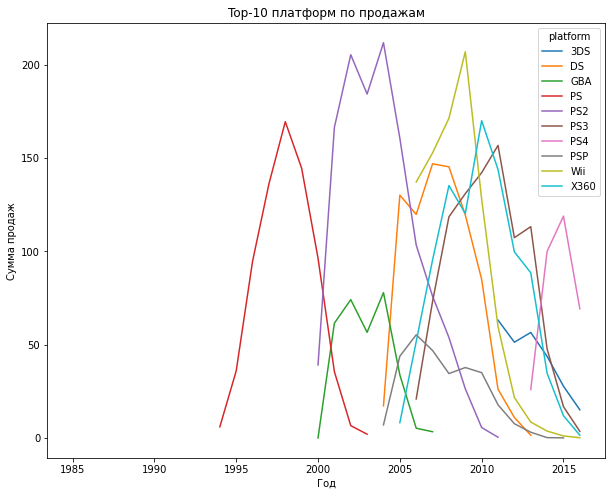

In [22]:
# Построим график с динамикой продаж игр на платформах "Top-10"
top_platforms.plot(kind = 'line', figsize = (10, 8))
plt.title('Top-10 платформ по продажам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

На графике видно, что срок жизни одной платформы составляет, в среднем, 9 лет. Из графика можно увидеть платформы, ответственные за определенные пики в продажах по годам. Так, небольшие пики 1998 и 2002 года явно связаны с PS и PS2, а самый большой пик 2008-2009 года - с Wii, Xbox 360, PSP и, частично, PS3.

In [23]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [24]:
df_actual = df.query('year_of_release > 2012')
df_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


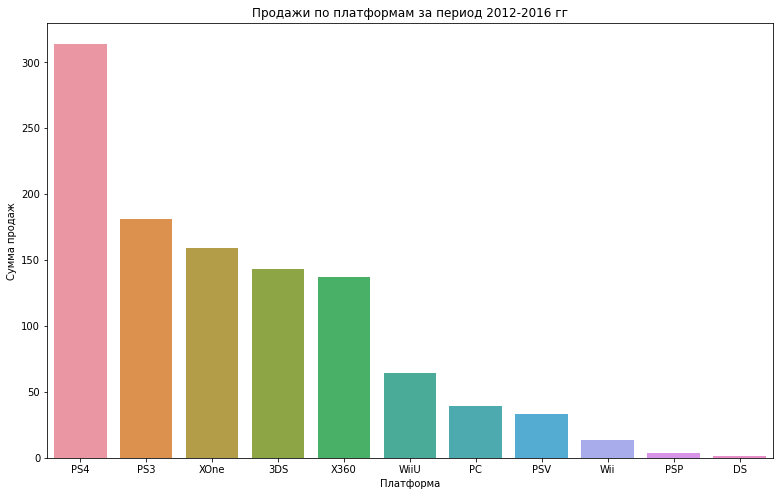

In [25]:
platform_total = (
    df_actual
    .pivot_table(index='platform', values='sales_total', aggfunc=sum)
    .sort_values(by='sales_total', ascending = False)
    )
plt.figure(figsize=(13,8))
(sns.barplot(data=platform_total, x = platform_total.index, y = 'sales_total'))
plt.title('Продажи по платформам за период 2012-2016 гг')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Хорошо видно, что топ 3 продаж составляют PS4, PS3 И XOne. Необычайно низкие продажи PC. Игровые консоли нового поколения имеют высокие продажи, особенно PS4, к сожалению, хоть WiiU и относится к новому поколению консолей, продажи этой приставки ниже чем у PS3 и Х360. В целом, считаю, что лучше ориентироваться на PS4 И XOne, потому что это консоли нового поколения и имеют высокие продажи.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [26]:
#создадим таблицу с информацией о ТОП-6 платформах
top_platforms = df_actual[df_actual['platform'].isin(['PS4','X360','PS3','XOne','3DS','WiiU'])]

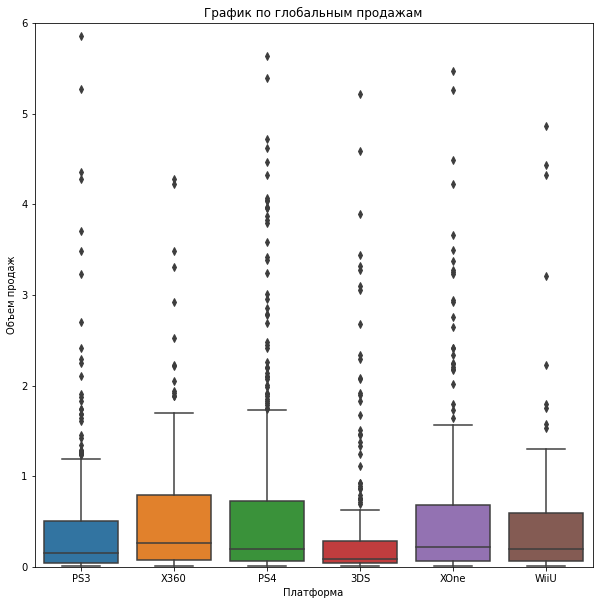

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data=top_platforms, x='platform', y='sales_total')
plt.title('График по глобальным продажам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж');
plt.ylim (0,6);

По играм видно, что 3DS сильно проседает, а на WiiU неплохо покупают игры. Также, довольно много игр покупают для X360.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

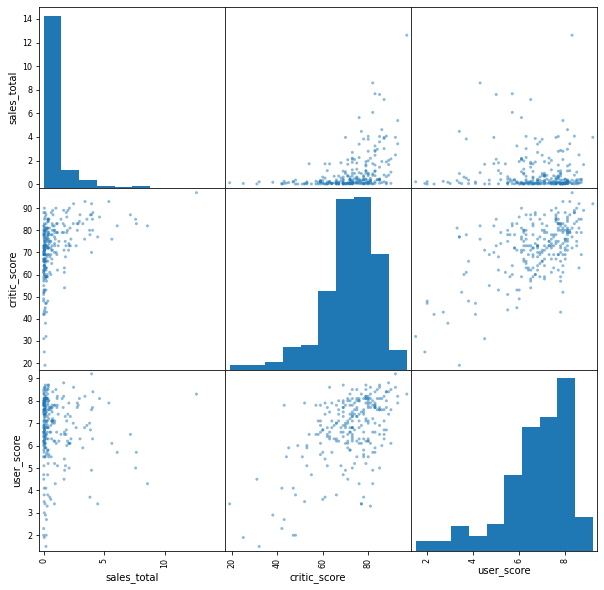

In [28]:
df_ps4 = df_actual[df_actual['platform'] == 'PS4']
#создадим таблицу лишь с столбцами суммы, и оценки пользователей и критиков
df_ps4 = df_ps4.loc[:, ['sales_total', 'critic_score', 'user_score']]
#Построим матрицу рассеяния
pd.plotting.scatter_matrix(df_ps4, figsize=(10, 10));

In [29]:
#матрица корреляции
df_ps4.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Сильной зависимости между оценкой игроков и продажами нет. Стоит заметить, что на оценку игроков влияют критики. Чем выше оценка критика, тем лучше мнение игрока.

Корреляция: -0.031957110204556376


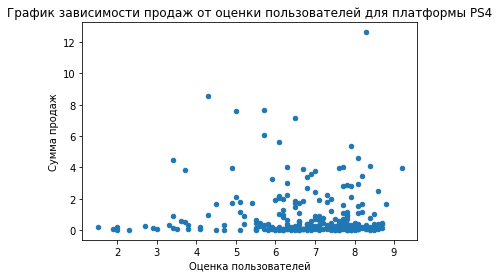

In [30]:
df_actual.query('platform == "PS4"').plot(x='user_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки пользователей для платформы PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "PS4"')['user_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: 0.40656790206178095


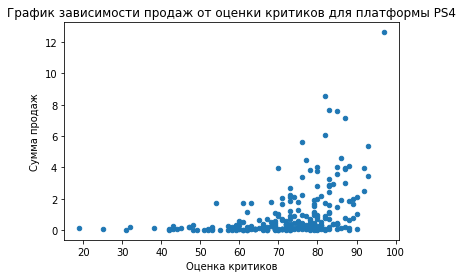

In [31]:
df_actual.query('platform == "PS4"').plot(x='critic_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки критиков для платформы PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "PS4"')['critic_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Можно сделать вывод, что корреляция для критиков более устойчива чем для пользователей. Посмотрим на другие платформы.

Корреляция: 0.0023944027357566925


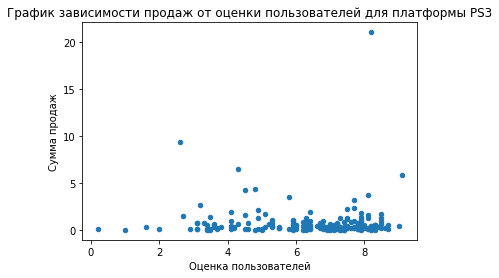

In [32]:
df_actual.query('platform == "PS3"').plot(x='user_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки пользователей для платформы PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "PS3"')['user_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: 0.3342853393371919


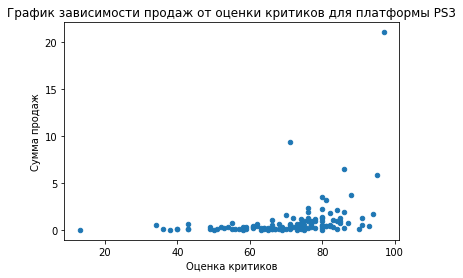

In [33]:
df_actual.query('platform == "PS3"').plot(x='critic_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки критиков для платформы PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "PS3"')['critic_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: -0.06892505328279414


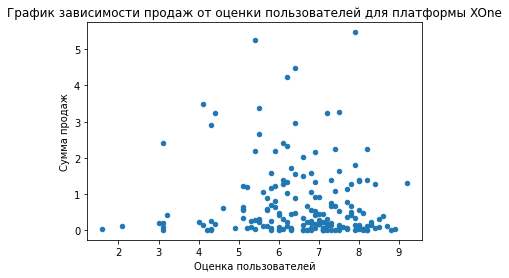

In [34]:
df_actual.query('platform == "XOne"').plot(x='user_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки пользователей для платформы XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "XOne"')['user_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: 0.4169983280084017


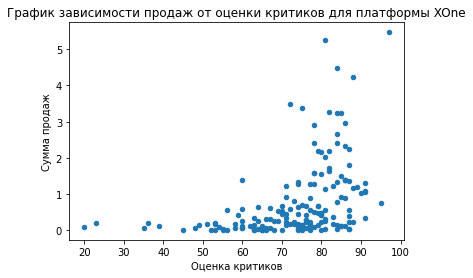

In [35]:
df_actual.query('platform == "XOne"').plot(x='critic_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки критиков для платформы XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "XOne"')['critic_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: 0.24150411773563016


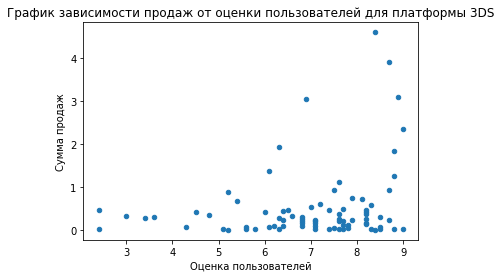

In [36]:
df_actual.query('platform == "3DS"').plot(x='user_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки пользователей для платформы 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "3DS"')['user_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: 0.3570566142288103


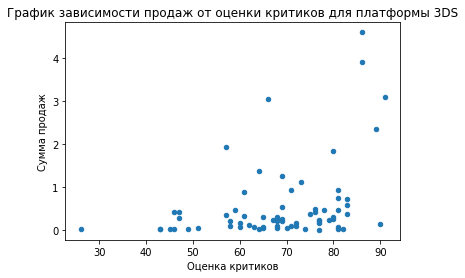

In [37]:
df_actual.query('platform == "3DS"').plot(x='critic_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки критиков для платформы 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "3DS"')['critic_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: -0.011742185147181342


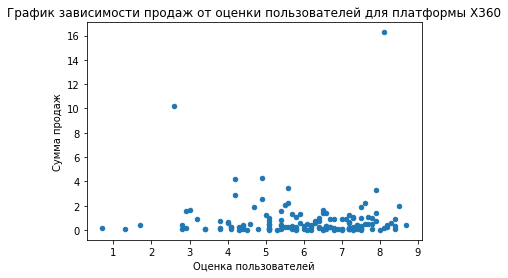

In [38]:
df_actual.query('platform == "X360"').plot(x='user_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки пользователей для платформы X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "X360"')['user_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Корреляция: 0.3503445460228664


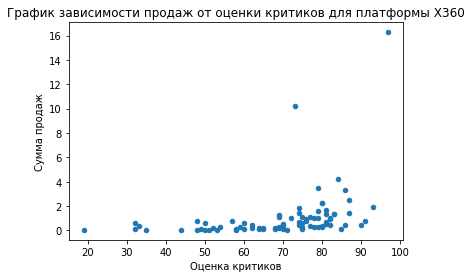

In [39]:
df_actual.query('platform == "X360"').plot(x='critic_score', y='sales_total', kind='scatter')
plt.title('График зависимости продаж от оценки критиков для платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
df_corr = df_actual.query('platform == "X360"')['critic_score'].corr(df_actual['sales_total'])
print('Корреляция:', df_corr)

Если сравнивать результаты корреляции PS4 с другими платформами, то можно заметить, что корреляция для отзывов критиков более существена чем для пользователей. Исключением будет 3DS где можно заметить самую большую корреляция для отзывов пользователей среди всех платформ, но в целом она тоже не очень большая.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [40]:
# Отобразим сводную таблицу по количеству игр, по суммарным и медианным продажам в разных жанрах 
df_actual.pivot_table(index = 'genre', values = 'sales_total', aggfunc = ['count', 'sum', 'median'])\
.sort_values(by = ('median', 'sales_total'), ascending = False)

,count,sum,median
,sales_total,sales_total,sales_total
genre,,,
Shooter,187,232.98,0.450
Sports,214,150.65,0.240
Platform,74,42.63,0.225
Role-Playing,292,145.89,0.125
Fighting,80,35.31,0.125
Racing,85,39.89,0.120
Action,766,321.87,0.110
Simulation,62,21.76,0.100


Самым продаваемым жанром является shooter, данный жанр также характеризуется наибольшим показателем медианных продаж - шутеры продаются в 2 раза лучше, чем ближайшие кокнуренты sports и platform. Самый непопулярный жанр это Adventure.

# Вывод:
- В 80-е выпускалось очень мало игр каждый год, в 90-е и 00-е количество игр выпускаемых каждый год постепенно увеличивалось, не смотря на небольшие спады, с 2009 по 2011 виден резкий спад, в период с 2012 по 2016 количество игр выпускаемых каждый год постепенно выравнелось.
- Срок жизни одной платформы составляет, в среднем, 9 лет. Из графика можно увидеть платформы, ответственные за определенные пики в продажах по годам. Так, небольшие пики 1998 и 2002 года явно связаны с PS и PS2, а самый большой пик 2008-2009 года - с Wii, Xbox 360, PSP и, частично, PS3.
- Топ 3 продаж составляют PS4, PS3 И XOne. Необычайно низкие продажи PC. Игровые консоли нового поколения имеют высокие продажи, особенно PS4, к сожалению, хоть WiiU и относится к новому поколению консолей, продажи этой приставки ниже чем у PS3 и Х360. В целом, считаю, что лучше ориентироваться на PS4 И XOne, потому что это консоли нового поколения и имеют высокие продажи.
- Корреляция для критиков более устойчива чем для пользователей
- Если сравнивать результаты корреляции PS4 с другими платформами, то можно заметить, что корреляция для отзывов критиков более существена чем для пользователей. Исключением будет 3DS где можно заметить самую большую корреляция для отзывов пользователей среди всех платформ, но в целом она тоже не очень большая.
- Самым продаваемым жанром является shooter, данный жанр также характеризуется наибольшим показателем медианных продаж - шутеры продаются в 2 раза лучше, чем ближайшие кокнуренты sports и platform. Самый непопулярный жанр это Adventure.

# Шаг 4. Составить портрет пользователя каждого региона

Определите самые популярные платформы (топ-5). Опишите различия в долях продаж.

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


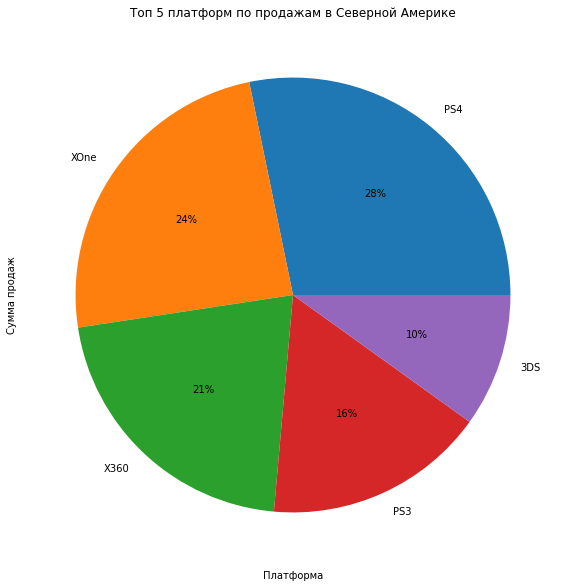

In [41]:
na_region = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_region['na_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ 5 платформ по продажам в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
na_region

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


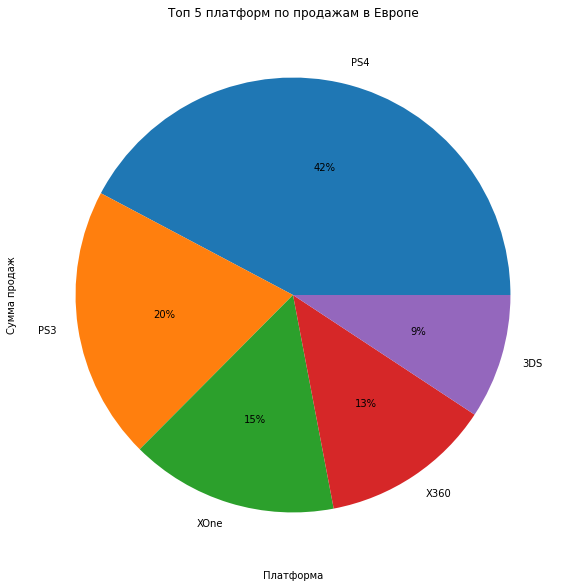

In [42]:
eu_region = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_region['eu_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ 5 платформ по продажам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
eu_region

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


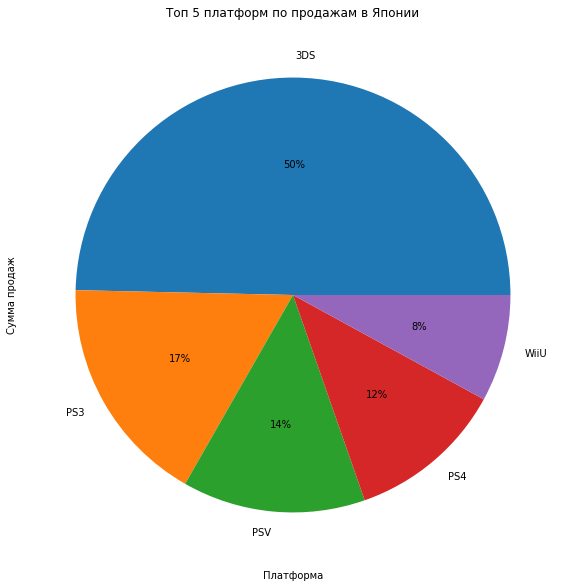

In [43]:
jp_region = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_region['jp_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ 5 платформ по продажам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
jp_region

Профиль пользователей Северной Америки и Европы в некотором роде похож. Наиболее популярной платформой в этих регионах являются PS4. Но в Японии картина значительно отличается, наиболее популярной платформой здесь является 3DS, и она одна занимает значительную часть рынка. Также видно, что топ-5 платформ занимаю большую часть рынка.

Определите самые популярные жанры (топ-5). Поясните разницу.

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


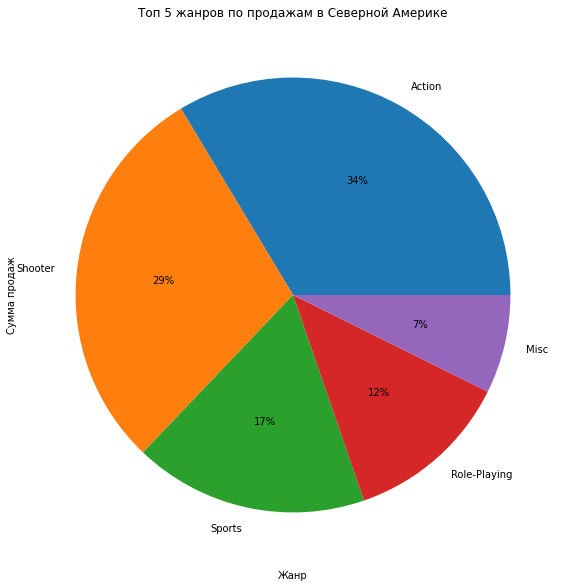

In [44]:
na_genres = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_genres['na_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ 5 жанров по продажам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
na_genres

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


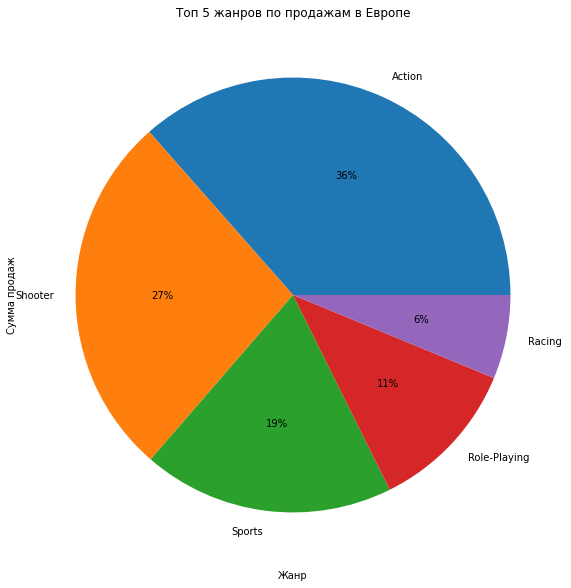

In [45]:
eu_genres = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_genres['eu_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ 5 жанров по продажам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
eu_genres

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


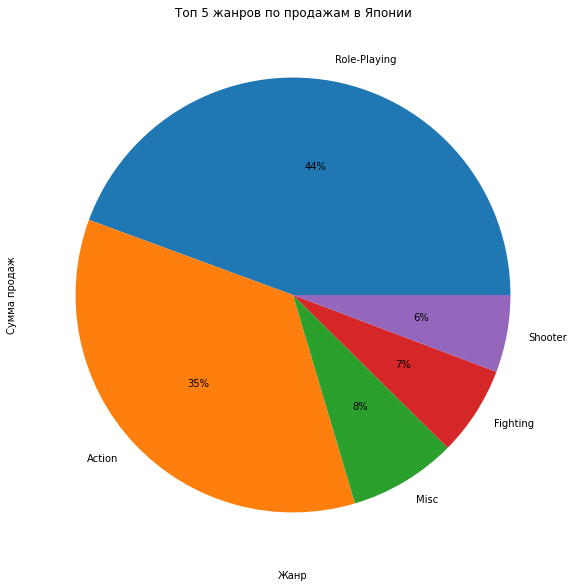

In [46]:
jp_genres = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_genres['jp_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ 5 жанров по продажам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
jp_genres

Из полученных данных видно для Северной Америки и Европы популярные жанры, как и их доли на рынке, практически совпадают. В Японии большую часть рынка занимают RPG игры и action.

Определите влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


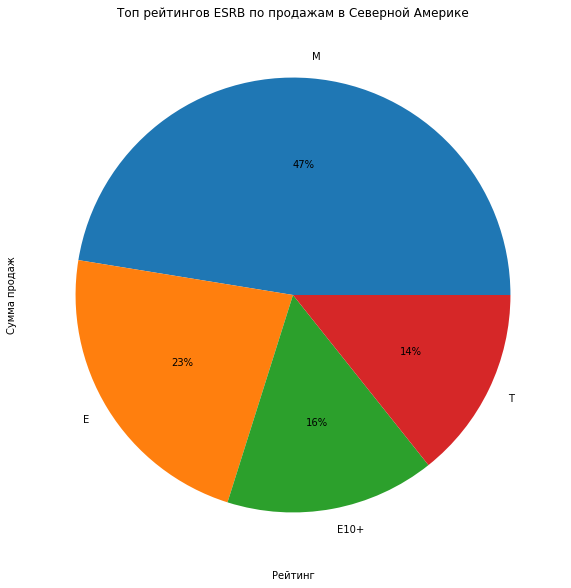

In [47]:
na_esrb = df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_esrb['na_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ рейтингов ESRB по продажам в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
na_esrb

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


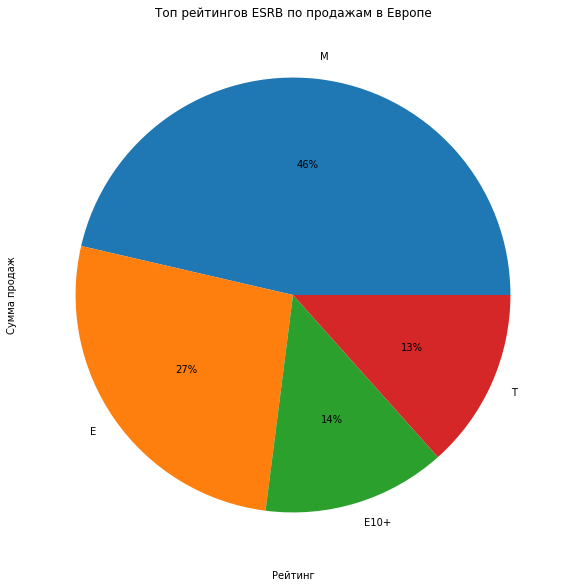

In [48]:
eu_esrb = df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_esrb['eu_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ рейтингов ESRB по продажам в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
eu_esrb

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


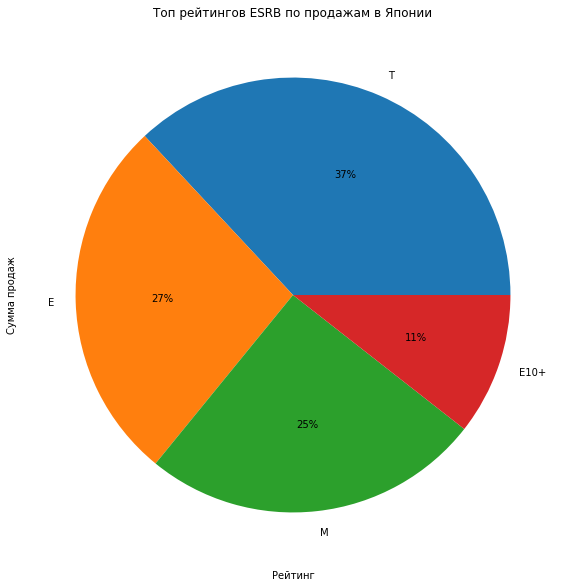

In [49]:
jp_esrb = df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_esrb['jp_sales'].plot(kind='pie', figsize=(10,10), autopct='%.0f%%')
plt.title('Топ рейтингов ESRB по продажам в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
jp_esrb

По аналогии с жанрами Северная Америка и Европа очень схожи - близкое количество продаж и одинаковый топ рейтинга: в основном предпочитают игры со взрослым рейтингом. А в Японии, с большим отрывом на первом месте идут игры для подростков.

In [50]:
# Комментарий ревьюера
temp = df_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

977 0.43752798925212716


NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

# Вывод:
- Профиль пользователей Северной Америки и Европы в некотором роде похож. Наиболее популярной платформой в этих регионах являются PS4. Но в Японии картина значительно отличается, наиболее популярной платформой здесь является 3DS, и она одна занимает значительную часть рынка. Также видно, что топ-5 платформ занимаю большую часть рынка.
- Из полученных данных видно для Северной Америки и Европы популярные жанры, как и их доли на рынке, практически совпадают. В Японии большую часть рынка занимают RPG игры и action.
- По аналогии с жанрами Северная Америка и Европа очень схожи - близкое количество продаж и одинаковый топ рейтинга: в основном предпочитают игры со взрослым рейтингом. А в Японии, с большим отрывом на первом месте идут игры для подростков.

# Шаг 5. Проверить гипотезы

- Нулевая гипотеза(H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза(H1): Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [51]:
# укажем уровень статиcтической значимости
alpha = 0.05

sample1 = df_actual.query('platform == "XOne"')['user_score']

sample2 =  df_actual.query('platform == "PC"')['user_score']

results = st.ttest_ind(sample1, sample2, alternative = 'two-sided', nan_policy='omit', equal_var = True)

print('p-value:', results.pvalue) 

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


При проверке гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, P-значение оказалось равным 0.14012658403611503, что выше заданного порогового значения alpha. При таком высоком P-значении отвергнуть H0 не представляется возможным. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Нулевая гипотеза(H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза(H1): Средние пользовательские рейтинги жанров Action и Sports разные.

In [52]:
# укажем уровень статиcтической значимости
alpha = 0.05

sample1 = df_actual.query('genre == "Action"')['user_score']

sample2 = df_actual.query('genre == "Sports"')['user_score']

results = st.ttest_ind(sample1, sample2, alternative ='two-sided', nan_policy ='omit')

print('p-value:', results.pvalue)

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


При проверке гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports, P-значение оказалось равным 1.0517832389139422e-27, что существенно меньше заданного порогового значения alpha. При таком P-значении нулевая гипотеза H0 была отвергнута. Таким образом, средние пользовательские рейтинги жанров Action и Sports разные.

# Вывод:
- При проверке гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, P-значение оказалось равным 0.14012658403611503, что выше заданного порогового значения alpha. При таком высоком P-значении отвергнуть H0 не представляется возможным. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- При проверке гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports, P-значение оказалось равным 1.0517832389139422e-27, что существенно меньше заданного порогового значения alpha. При таком P-значении нулевая гипотеза H0 была отвергнута. Таким образом, средние пользовательские рейтинги жанров Action и Sports разные.

- Мы сформулировали нулевые гипотезы о, том что средние двух генеральных совокупностей одинаковые. Нас интересует отклонение как в большую, так и в меньшую сторону, поэтому альтернативные гипотезы о неравенстве средних будут двухсторонними.
- Так как мы будем сравнивать средние двух генеральных совокупностей между собой, мы выбираем метод t-теста то есть, t-критерий Стьюдента(генеральные совокупности независимы, выборочные средние распределены нормально, выборки достаточно большие).

# Шаг 6. Написать общий вывод
- В датасете 11 столбцов с различными данными. Необходимо привести названия столбцов к нижнему регистру, преобразовать данные в нужные типы, обработать пропуски, посчитать суммарные продажи во всех регионах и записать в отдельный столбец.
- Возмножно пропуски в столбцах critic_score, user_score и rating связаны с тем, что их необязательно заполнять. Или в базе данных интернет-магазина «Стримчик» нету этих данных.
- Была выполнена проверка на дубликаты, столбцы были приведены к нижнему регистру. В колонка critic_score, user_score и rating было обнаруженно множество пропусков, но было решено оставить их из-за невозможности правильного заполнения. Значения tbd были заменены на nan, необходимые столбцы были приведены к нужным типам данных.
- В 80-е выпускалось очень мало игр каждый год, в 90-е и 00-е количество игр выпускаемых каждый год постепенно увеличивалось, не смотря на небольшие спады, с 2009 по 2011 виден резкий спад, в период с 2012 по 2016 количество игр выпускаемых каждый год постепенно выравнелось.
- Срок жизни одной платформы составляет, в среднем, 9 лет. Из графика можно увидеть платформы, ответственные за определенные пики в продажах по годам. Так, небольшие пики 1998 и 2002 года явно связаны с PS и PS2, а самый большой пик 2008-2009 года - с Wii, Xbox 360, PSP и, частично, PS3.
- Топ 3 продаж составляют PS4, PS3 И XOne. Необычайно низкие продажи PC. Игровые консоли нового поколения имеют высокие продажи, особенно PS4, к сожалению, хоть WiiU и относится к новому поколению консолей, продажи этой приставки ниже чем у PS3 и Х360. В целом, считаю, что лучше ориентироваться на PS4 И XOne, потому что это консоли нового поколения и имеют высокие продажи.
- По играм видно, что 3DS сильно проседает, а на WiiU неплохо покупают игры. Также, довольно много игр покупают для X360.
- Если сравнивать результаты корреляции PS4 с другими платформами, то можно заметить, что корреляция для отзывов критиков более существена чем для пользователей. Исключением будет 3DS где можно заметить самую большую корреляция для отзывов пользователей среди всех платформ, но в целом она тоже не очень большая.
- Самым продаваемым жанром является shooter, данный жанр также характеризуется наибольшим показателем медианных продаж - шутеры продаются в 2 раза лучше, чем ближайшие кокнуренты sports и platform. Самый непопулярный жанр это Adventure.
- Профиль пользователей Северной Америки и Европы в некотором роде похож. Наиболее популярной платформой в этих регионах являются PS4. Но в Японии картина значительно отличается, наиболее популярной платформой здесь является 3DS, и она одна занимает значительную часть рынка. Также видно, что топ-5 платформ занимаю большую часть рынка.
- Из полученных данных видно для Северной Америки и Европы популярные жанры, как и их доли на рынке, практически совпадают. В Японии большую часть рынка занимают RPG игры и action.
- По аналогии с жанрами Северная Америка и Европа очень схожи - близкое количество продаж и одинаковый топ рейтинга: в основном предпочитают игры со взрослым рейтингом. А в Японии, с большим отрывом на первом месте идут игры для подростков.
- При проверке гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, P-значение оказалось равным 0.14012658403611503, что выше заданного порогового значения alpha. При таком высоком P-значении отвергнуть H0 не представляется возможным. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- При проверке гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports, P-значение оказалось равным 1.0517832389139422e-27, что существенно меньше заданного порогового значения alpha. При таком P-значении нулевая гипотеза H0 была отвергнута. Таким образом, средние пользовательские рейтинги жанров Action и Sports разные.